In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas
import datetime as dt

In [13]:
# Loading the csv file.
x = pandas.read_csv("Train.csv")
samples = x["Count"]
date_format = "%d-%m-%Y %H:%M"
N = len(samples)

first_date = dt.datetime.strptime(x["Datetime"][0], date_format)
last_date = dt.datetime.strptime(x["Datetime"][N-1], date_format)

interval = (last_date-first_date).days * 24 * 3600
frequency = N / interval

print(f"Frecventa este de {frequency}Hz, adica 24 ori pe zi")
print(f"Intervalul de timp este {first_date} - {last_date}, adica {interval} secunde")
print(f"Frecventa maxima prezenta in semnal este {frequency/2}")

Frecventa este de 0.00027814279456855016Hz, adica 24 ori pe zi
Intervalul de timp este 2012-08-25 00:00:00 - 2014-09-25 23:00:00, adica 65750400 secunde
Frecventa maxima prezenta in semnal este 0.00013907139728427508


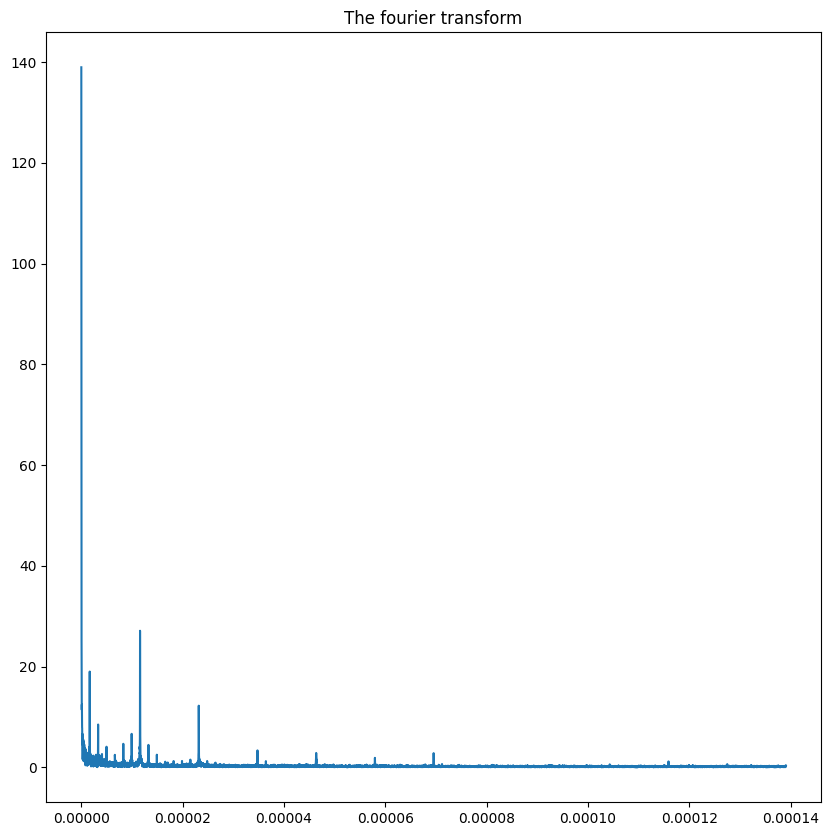

In [25]:
fig, axs = plt.subplots(1, figsize=(10,10))

# Computing the fourier transform.
fft = np.fft.fft(samples)
fft = np.abs(fft / N)
fft = fft[:N//2]
f = frequency/N * np.linspace(0, N//2, N//2)

axs.set_title("The fourier transform")
axs.plot(f, fft)

The component is: 138.95811461067368


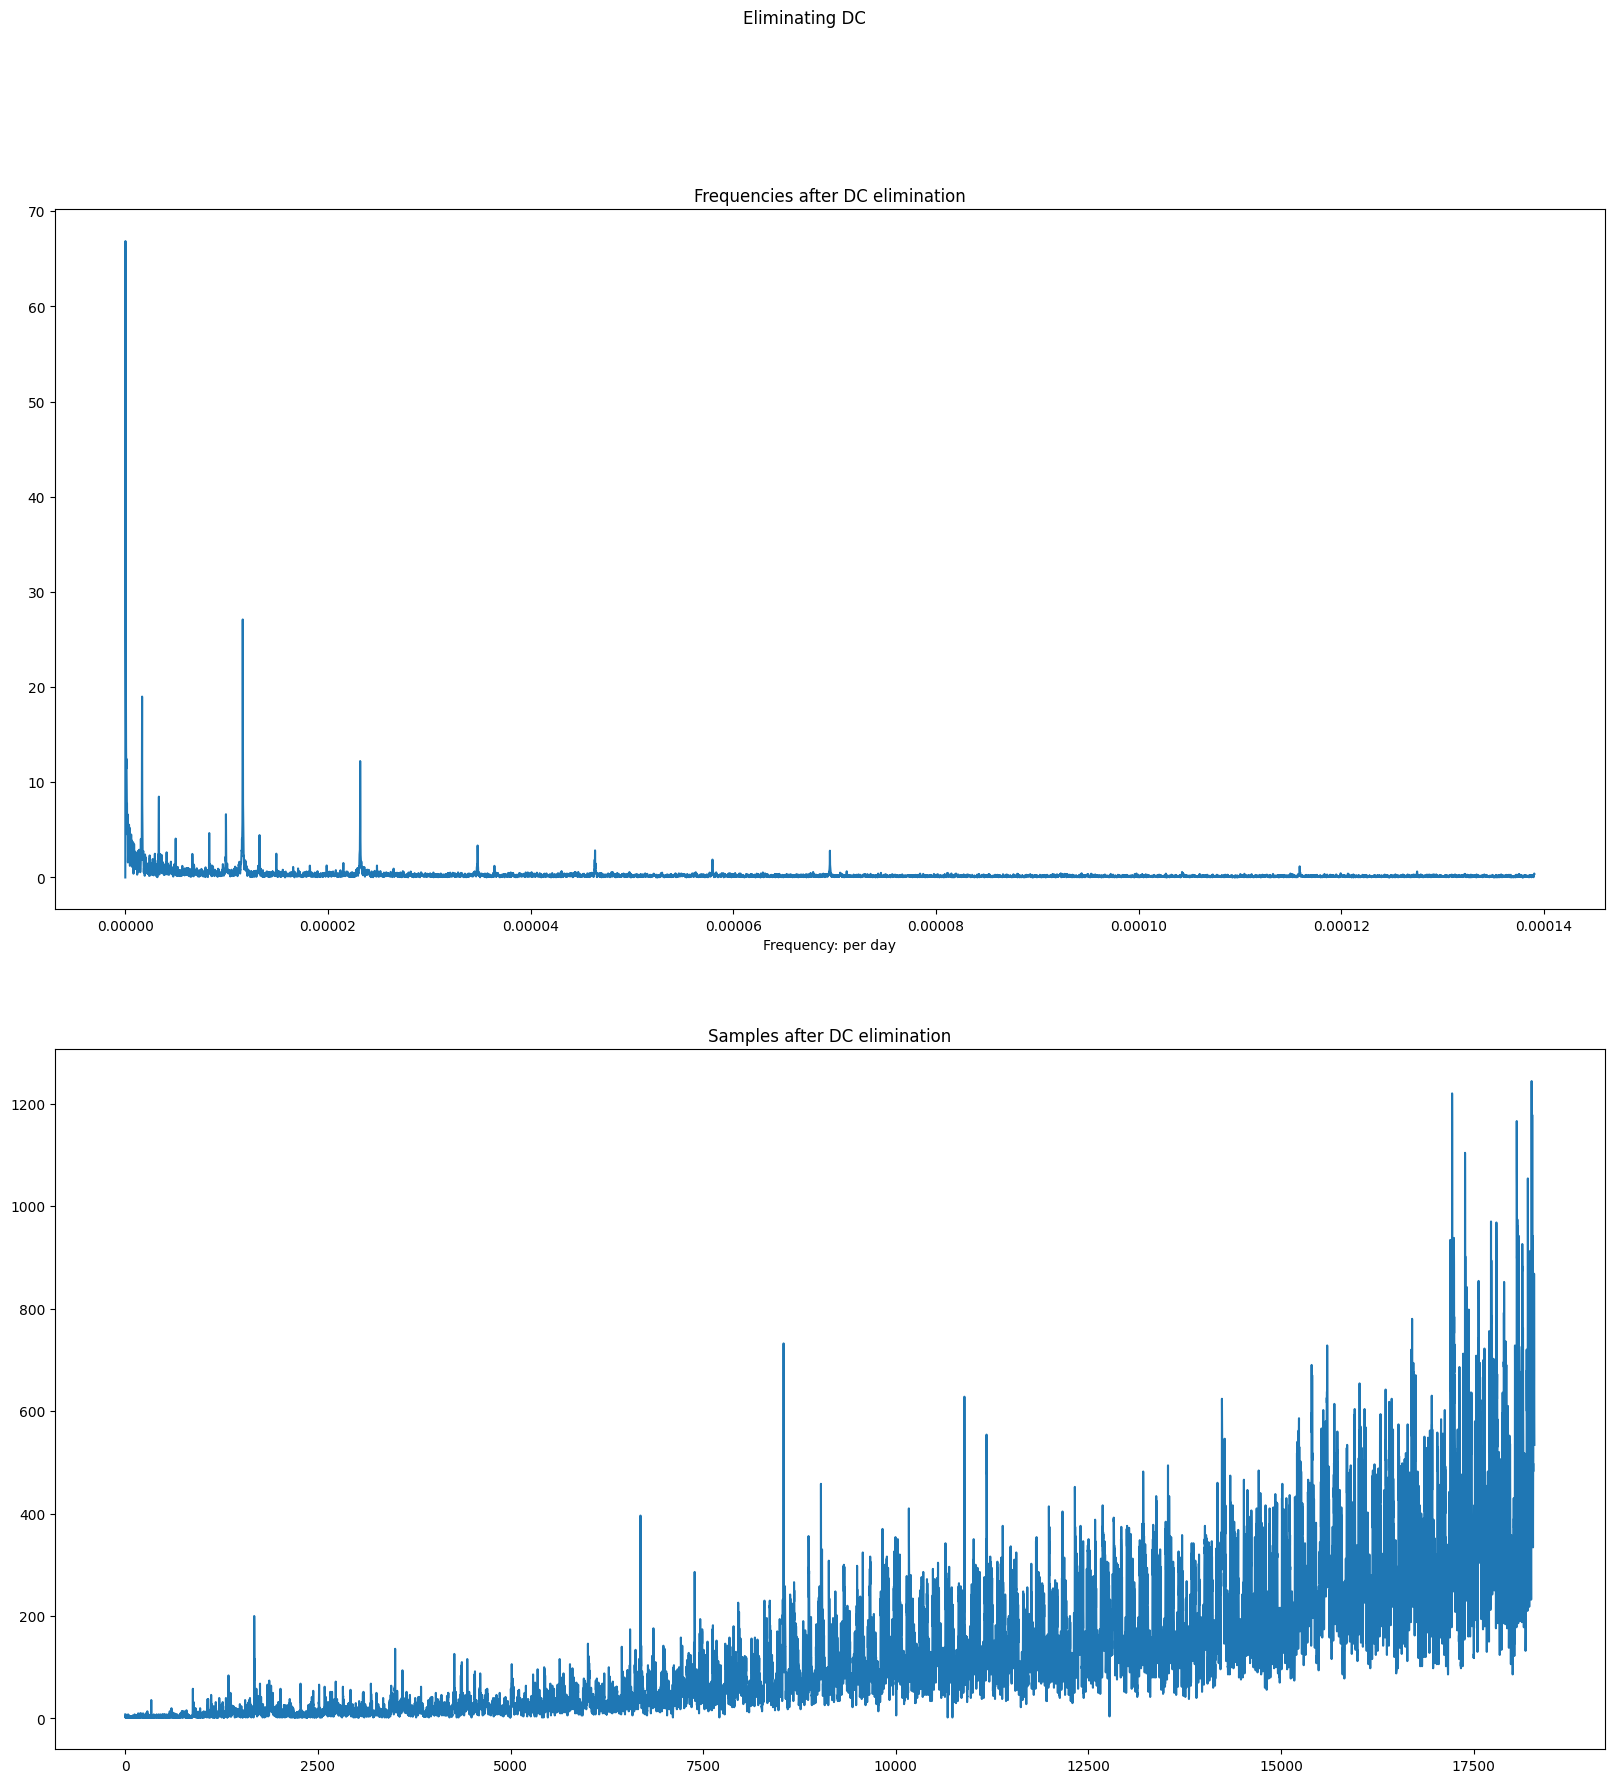

In [15]:
# Eliminating the continuous component
fig, axs = plt.subplots(2, figsize=(20,20))
fig.suptitle("Eliminating DC")

component = fft[0]
print(f"The component is: {component}")
new_samples = samples - component

new_fft = np.fft.fft(new_samples)
new_fft = np.abs(new_fft / N)
new_fft = new_fft[:N//2]
f = frequency/N * np.linspace(0, N//2, N//2)

axs[0].set_title("Frequencies after DC elimination")
axs[0].plot(f, new_fft)


axs[1].set_title("Samples after DC elimination")
axs[1].plot(samples)


In [21]:
# Computing the 4 best values in the fft.
idx = np.argsort(new_fft)[-5:]
results = f[idx]
print(results)

print(str(results[0] * 24 * 3600)+ " -> 1 per week")
print(str(results[2] * 24 * 3600)+ " -> 1 per day")
print(str(results[3] * 24 * 3600)+ " -> 1 per year")
print(str(results[4] * 24 * 3600)+ " -> 0.5 per year")
print(str(results[1] * 24 * 3600)+ " -> ?")

[1.65796591e-06 4.56320892e-08 1.15905507e-05 3.04213928e-08
 1.52106964e-08]
0.14324825451869072 -> 1 per week
1.001423577460939 -> 1 per day
0.00262840833979249 -> 1 per year
0.001314204169896245 -> 0.5 per year
0.003942612509688735 -> ?


Start at sample:  6600
Start at date:  27-05-2013 00:00


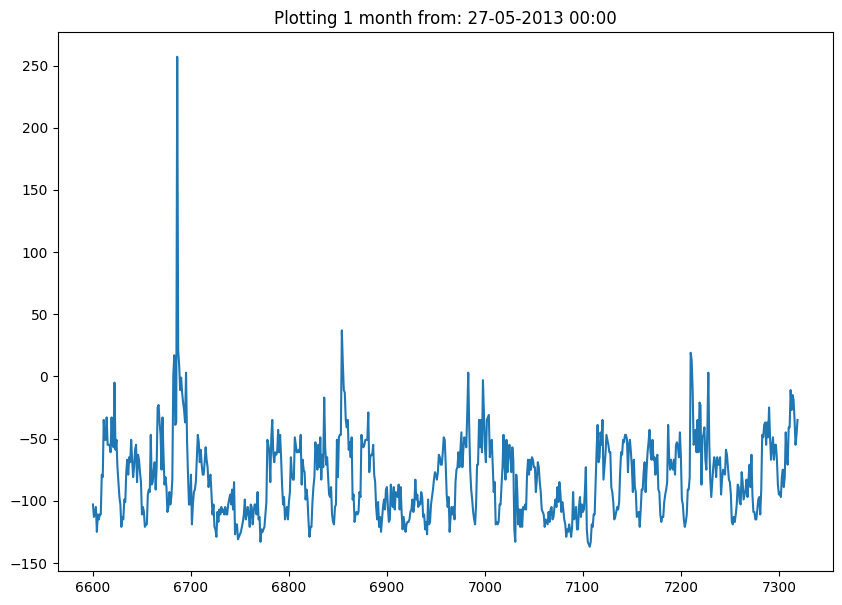

In [22]:
# Visualizing a month of traffic.
fig, axs = plt.subplots(1, figsize=(10,7))

# Calculating the amount of samples needed to span a month.
num_samples = 24 * 30  # 24 samples per day, so we need 24 * 30 samples for a month.

# Start on a monday.
start_day = 6500 
while dt.datetime.strptime(x["Datetime"][start_day], date_format).weekday() != 0:
    start_day+=1

print("Start at sample: ", start_day)
print("Start at date: ", x["Datetime"][start_day])

month_samples = new_samples[start_day: start_day + num_samples]

axs.set_title("Plotting 1 month from: " + x["Datetime"][start_day])
axs.plot(month_samples)

In [91]:
# Presupunem ca nu stim data la care a inceput masuratoarea. Notam data inceperii cu "x"
# De asemenea, sa presupunem ca avem o medie a traficului de saptamana trecuta. 
# 
# Dorim sa aproximam functia f(t) = traficul la momentul x + t 
# Putem sa folosim un algoritm de machine learning pentru time series forecasting.
#
# Dupa ce am aproximat functia, putem completa setul de date facand forecast din saptamana in saptamana.
# Completam setul de date pana cand ultima saptamana generata are media egala cu media actuala a saptamanii trecute. 
# Fie m argumentul lui f pentru care avg {f(m - i) | i in [1..7] } ~= media actuala
# Putem afla data la care a inceput masuratoarea scazand m din data curenta.

# Precizia acestui algoritm depinde de cat de departata este data actuala de data inceperii masuratorilor.  
# Cu cat este mai indepartat un moment pe care vrem sa il prezicem, cu atat precizia noastra va scadea.

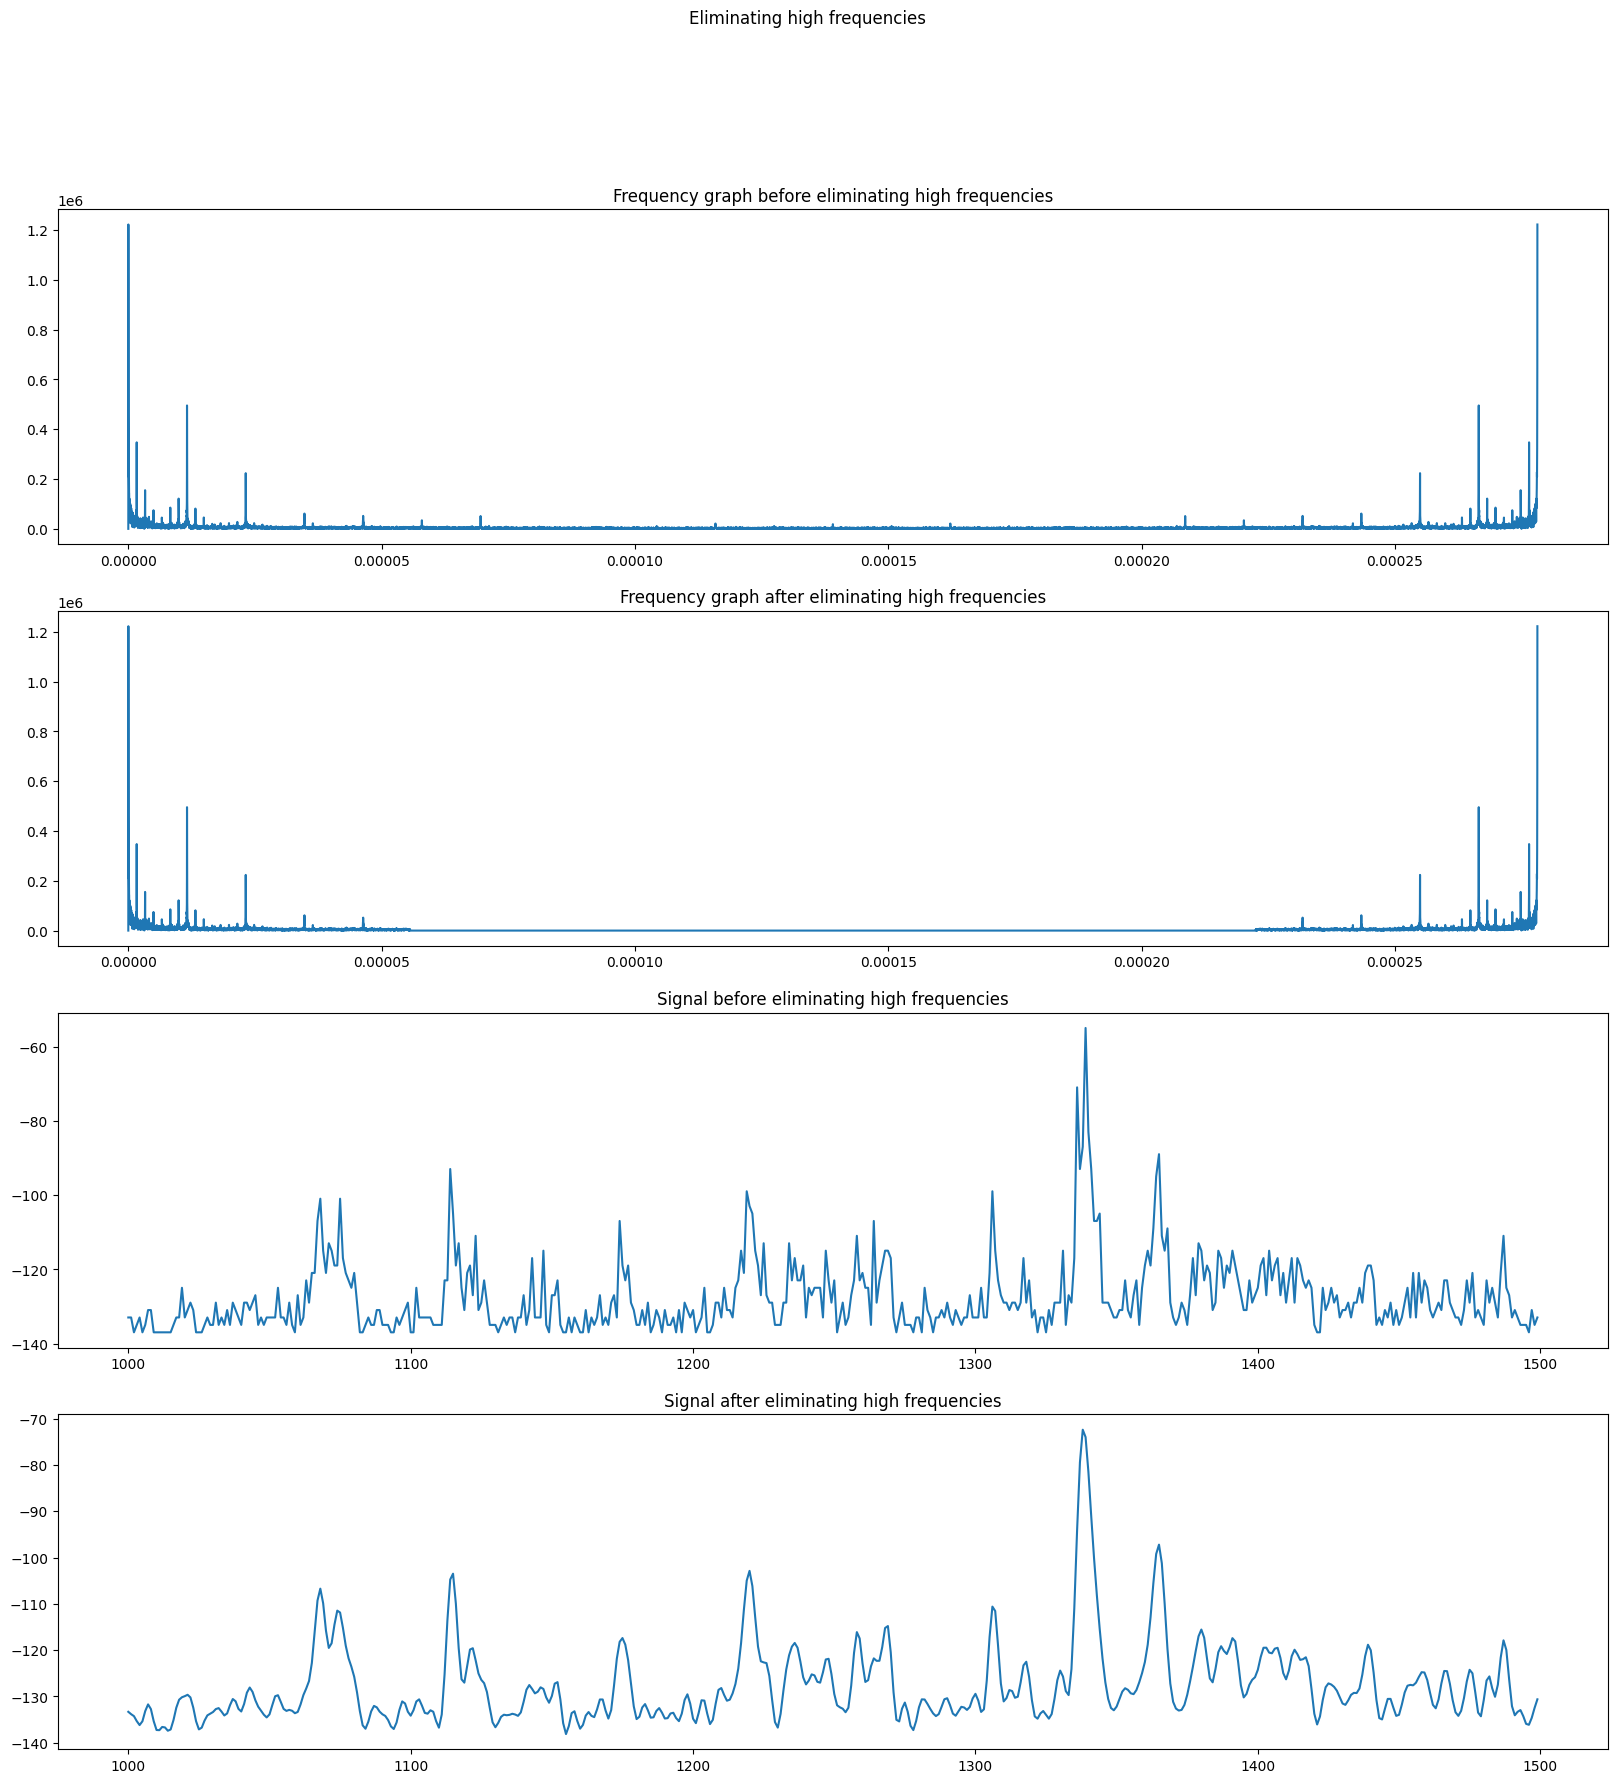

In [23]:
# Filtering high frequencies.
fig, axs = plt.subplots(4, figsize=(20,20))
fig.suptitle("Eliminating high frequencies")

original_fft = np.fft.fft(new_samples)
filtered_fft = original_fft.copy() 

for x in range(30*N//100):
    filtered_fft[N//2-x] = 0
    filtered_fft[N//2+x] = 0


f = frequency/N * np.linspace(0, N, N)
filtered_signal = np.fft.ifft(filtered_fft)

axs[0].set_title("Frequency graph before eliminating high frequencies")
axs[0].plot(f, np.abs(original_fft))
axs[1].set_title("Frequency graph after eliminating high frequencies")
axs[1].plot(f, np.abs(filtered_fft))

axs[2].set_title("Signal before eliminating high frequencies")
axs[2].plot(range(1000, 1500),new_samples[1000:1500])

axs[3].set_title("Signal after eliminating high frequencies")
axs[3].plot(range(1000, 1500), filtered_signal.real[1000:1500])

